In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [19]:
## TEST할 이미지 선택
test_image = X_test[0]
print(test_image.shape)

## NN 이미로 이차원으로 데이터를 넣어주어야 해서 1x784 형태로 reshape하고 필요하면 노말라이제이션
test_image_reshape = test_image.reshape(1, -1).astype('float64')
 ### (28x28)이미지 를 784 개로 reshape 앞에 1이라는 숫자는 데이터 1개다. batch size의미.
print(test_image_reshape.shape)

(28, 28)
(1, 784)


In [5]:
## 모델 불러오기
model = tf.keras.models.load_model("/content/drive/MyDrive/04-0.5783.hdf5") # 모델을 새로 불러옴 #Colab의 경우 P_04_01 모델에서 Root로 카피해옴
# model = tf.keras.models.load_model('./MNIST_model\\30-0.4827.hdf5') # 모델을 새로 불러옴

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# 불러온 모델로 값 예측하기.
Y_prediction = model.predict(test_image_reshape)
## Y_prediction = [[ 0.1 0.1 .... 0.7 0.1 ]] 1개의 이미지의 결과를  10개의 값 으로 예측
# 10개는 각 perceptron의 예측 값.

print(Y_prediction)

1/1 [==============================] - 0s 20ms/step
[[0.0000000e+00 0.0000000e+00 3.7285661e-32 8.6081457e-32 0.0000000e+00
  1.3204386e-33 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]]


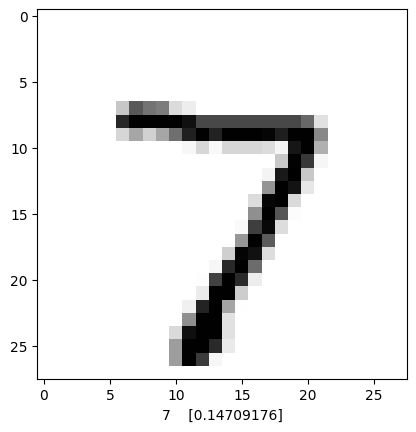

In [11]:
## 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은값을 출력하는 인덱스를 추출. 그럼 이것이 결국 class임.
### np.argmax는 들어온 행렬에서 가장 높은값이 있는 index를 반환해주는 함수.
index=np.argmax(Y_prediction)
vlaue=Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel(str(index)+"    " +str(vlaue))
plt.show()